# Д/З № 3

## Студеикина Мария Александровна

In [1]:
# Подключение нужных библиотек
import os
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import *
from pathlib import Path
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import keras.preprocessing.image

/Users/manya/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Задание нужных переменных, которые нам понадобятся позже
ROOT = Path('/Users/manya/Desktop/семестр 3/СКА/kaggle_bee_vs_wasp/')
SEED = 0
IMG_SIZE = 256
BATCH_SIZE = 32
labels = ['bee', 'wasp', 'insect']
table_data = []

In [3]:
# Загрузка данных и меняем столбец path для удобства
df = pd.read_csv(str(ROOT / 'labels.csv'))
df['path'] = [row.replace('\\', os.sep) for row in df['path']]
df.head()

,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,1,bee1/10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,2,bee1/10024864894_6dc54d4b34_n.jpg,1,0,0,0,1,0,1,bee
2,3,bee1/10092043833_7306dfd1f0_n.jpg,1,0,0,0,1,1,0,bee
3,4,bee1/1011948979_fc3637e779_w.jpg,1,0,0,0,1,0,1,bee
4,5,bee1/10128235063_dca17db76c_n.jpg,1,0,0,0,1,0,0,bee


In [4]:
# Функция, которая в зависимости от 'label' ('bee', 'wasp', 'incect'), выводит изображения, и общее количество образцов, 
# количество образцов низкого качества, высокого качества, количество обучающих, проверочных и тестовых образцов
def read_data(df, label, n_samples=5):
    q = df[df['label'] == label]
    samples = q.sample(n=n_samples)

    fig, ax = plt.subplots(nrows=1, ncols=n_samples, figsize=(4*n_samples,4))
    for i, path in enumerate(samples['path']):
        img = cv.imread(str(ROOT / path), -1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        ax[i].imshow(img)
        ax[i].axis('off')
    fig.suptitle(f'Label: {label}')
    plt.show()

    n = len(q)
    low = len(q[q['photo_quality'] == 0])
    val = len(q[q['is_validation'] == 1])
    test = len(q[q['is_final_validation'] == 1])
    print(f'Total number of samples for {label}: {n}')
    if label == 'bee' or label == 'wasp':
        print(f'Number of low quality samples: {low}')
        print(f'Number of high quality samples: {n - low}')
    print(f'Number of training samples: {n - val - test}')
    print(f'Number of validation samples: {val}')
    print(f'Number of testing samples: {test}')

Работа функции и вывод информации

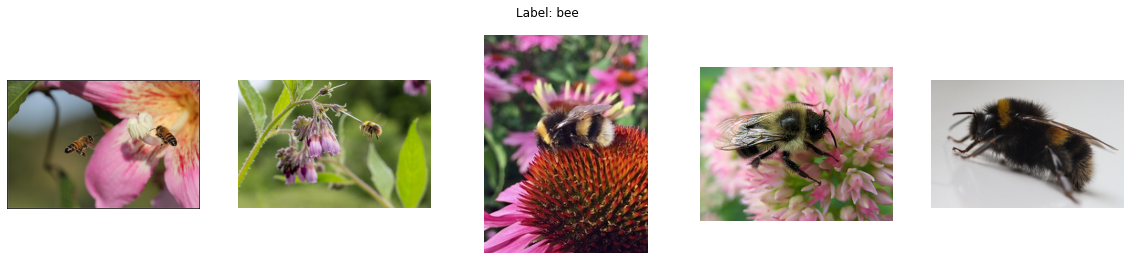

Total number of samples for bee: 3183
Number of low quality samples: 714
Number of high quality samples: 2469
Number of training samples: 2195
Number of validation samples: 484
Number of testing samples: 504


In [5]:
read_data(df, label=labels[0])

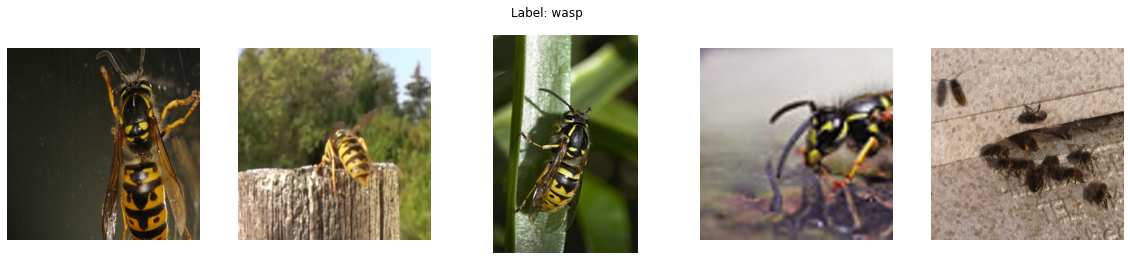

Total number of samples for wasp: 4943
Number of low quality samples: 2816
Number of high quality samples: 2127
Number of training samples: 3440
Number of validation samples: 750
Number of testing samples: 753


In [6]:
read_data(df, label=labels[1])

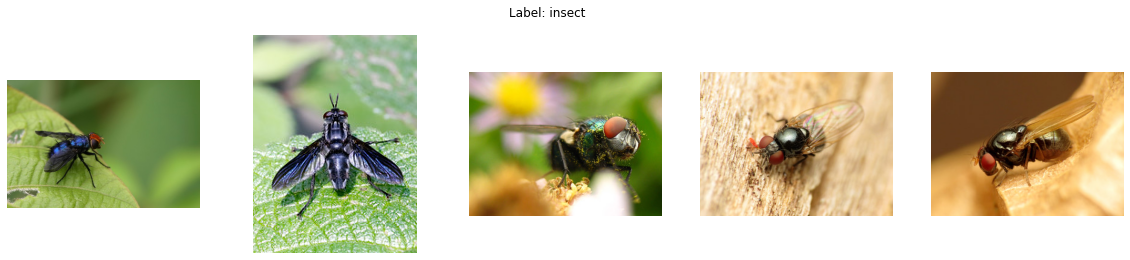

Total number of samples for insect: 2439
Number of training samples: 1706
Number of validation samples: 357
Number of testing samples: 376


In [7]:
read_data(df, label=labels[2])

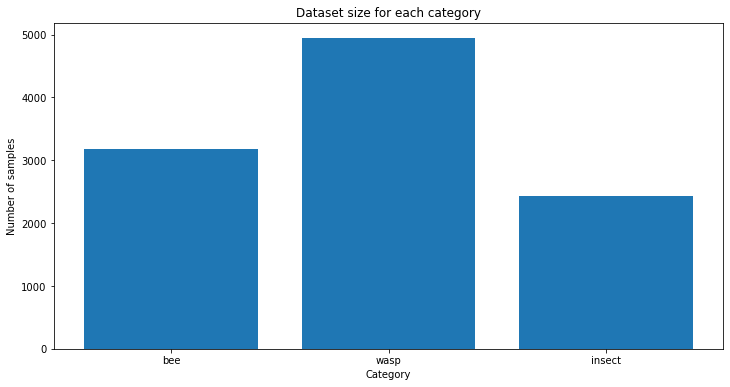

In [8]:
# Столбчатая диаграмма, которая показывает количество пчел, ос и других насекомых
plt.figure(figsize=(12, 6))
plt.bar(labels, [len(df[df['label'] == label]) for label in labels])
plt.title('Dataset size for each category')
plt.xlabel('Category')
plt.ylabel('Number of samples')
plt.show()

In [9]:
# Разделение на тестовую, тренировочную и валидационную выборки
train_df = df[(df['is_validation'] == 0) & (df['is_final_validation'] == 0)].reset_index(drop=True)
val_df = df[df['is_validation'] == 1].reset_index(drop=True)
test_df = df[df['is_final_validation'] == 1].reset_index(drop=True)

В данном коде происходит разделение исходного DataFrame `df` на три новых DataFrame: `train_df`, `val_df` и `test_df`.

В первой строке:
- `df['is_validation'] == 0` означает, что выбираются только те строки, где значение в столбце "is_validation" равно 0.
- `df['is_final_validation'] == 0` означает, что выбираются только те строки, где значение в столбце "is_final_validation" равно 0.
- `reset_index(drop=True)` сбрасывает индекс строки и создает новый индекс, начиная с нуля.
Таким образом, `train_df` будет содержать только те строки из `df`, где "is_validation" и "is_final_validation" имеют значение 0.

Во второй строке:
- `df['is_validation'] == 1` означает, что выбираются только те строки, где значение в столбце "is_validation" равно 1.
- `reset_index(drop=True)` сбрасывает индекс строки и создает новый индекс, начиная с нуля.
Таким образом, `val_df` будет содержать только те строки из `df`, где "is_validation" имеет значение 1.

В третьей строке:
- `df['is_final_validation'] == 1` означает, что выбираются только те строки, где значение в столбце "is_final_validation" равно 1.
- `reset_index(drop=True)` сбрасывает индекс строки и создает новый индекс, начиная с нуля.
Таким образом, `test_df` будет содержать только те строки из `df`, где "is_final_validation" имеет значение 1.

Эти операции позволяют разделить исходный DataFrame на отдельные части в соответствии с условиями для дальнейшего использования в алгоритмах обучения, валидации и тестирования модели.

In [10]:
# Вывод тренировочной выборки для визуальной проверки
train_df

,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,1,bee1/10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,5,bee1/10128235063_dca17db76c_n.jpg,1,0,0,0,1,0,0,bee
2,6,bee1/10130729734_f68738333e_w.jpg,1,0,0,0,1,0,0,bee
3,7,bee1/10166485783_9cd6706c72_n.jpg,1,0,0,0,1,0,0,bee
4,8,bee1/10179824_84803290ac_m.jpg,1,0,0,0,1,0,0,bee
...,...,...,...,...,...,...,...,...,...,...
7934,11406,other_noinsect/580930.jpg,0,0,0,1,0,0,0,other
7935,11407,other_noinsect/580942.jpg,0,0,0,1,0,0,0,other
7936,11408,other_noinsect/580943.jpg,0,0,0,1,0,0,0,other
7937,11412,other_noinsect/581206.jpg,0,0,0,1,0,0,0,other


In [11]:
# Предобработка: приведение значений пикселов входных изображений к интервалу [0,1]
datagen = preprocessing.image.ImageDataGenerator(rescale=1./255.)

train_datagen = datagen.flow_from_dataframe(train_df, 
                                            directory=str(ROOT), 
                                            x_col='path', 
                                            y_col='label',
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            seed=SEED
                                           ) 

val_datagen = datagen.flow_from_dataframe(val_df,
                                            directory=str(ROOT), 
                                            x_col='path', 
                                            y_col='label',
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            seed=SEED
                                           ) 

test_datagen = datagen.flow_from_dataframe(test_df, 
                                           directory=str(ROOT), 
                                           x_col='path', 
                                           y_col='label',
                                           target_size=(IMG_SIZE, IMG_SIZE),
                                           seed=SEED
                                           ) 

Found 7939 validated image filenames belonging to 4 classes.
Found 1719 validated image filenames belonging to 4 classes.
Found 1763 validated image filenames belonging to 4 classes.


Использую библиотеку Keras для обработки и подготовки изображений для обучения НС. 

Первая строка создает объект класса ImageDataGenerator, который предоставляет удобные методы для аугментации и нормализации изображений. В данном случае, rescale=1./255. указывает, что значения пикселей изображений должны быть масштабированы до диапазона от 0 до 1 путем деления на 255.

Вторая, третья и четвертая строки создают еще один объект класса ImageDataGenerator, но уже с чуть большими настройками. flow_from_dataframe - это метод, который принимает в качестве параметров train_df/val_df/test_df - это объект DataFrame, который содержит информацию о путях к изображениям и их метках, directory - путь к директории, содержащей изображения, x_col - имя столбца с путями к изображениям, y_col - имя столбца с метками изображений, target_size - размер целевого изображения, и seed - параметр для генерации случайных чисел. 

Это позволяет автоматически загружать изображения из директории, масштабировать их и преобразовывать в тензоры, готовые для использования в модели.

In [12]:
#train_X = train_datagen
#train_Y = None
#validation_all = val_datagen
#test_X = test_datagen
#test_Y = None

In [13]:
# Создание модели CNN
model = keras.Sequential()
model.add(keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(3))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(3))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax'))

Модели нейронной сети с использованием библиотеки Keras в Python.

`model = keras.Sequential()` создает последовательную модель, которая позволяет добавлять слои последовательно.

Слои:

- `model.add(keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)))` добавляет входной слой в модель с указанными размерами изображения (IMG_SIZE x IMG_SIZE) и 3 каналами цвета (RGB).

- `model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))` добавляет сверточный слой (Conv2D) в модель с 128 фильтрами, размером ядра 3x3, используя 'same' для дополнения пикселей по краям изображения и 'relu' в качестве функции активации.

- `model.add(layers.MaxPooling2D(3))` добавляет слой пулинга (MaxPooling2D) в модель с размером окна 3x3 для уменьшения размера изображения и выбора наибольшего значения из каждой области.

- `model.add(layers.Dropout(0.2))` добавляет слой Dropout с коэффициентом 0.2, что позволяет случайным образом обнулять выходные значения для предотвращения переобучения модели.

- `model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))` добавляет слой свертки (Convolutional layer) в модель. Здесь используется Conv2D, поскольку предполагается, что мы работаем с двумерными изображениями. Аргументы этой функции:
   - 256: количество фильтров (ядер) в слое. Каждое ядро будет выполнять операцию свертки с входным изображением, чтобы извлечь определенные признаки.
   - 3: размер ядра для свертки.
   - padding='same': опция задания типа паддинга. Здесь используется значение 'same', чтобы выходные данные имели ту же ширину и высоту, что и входные данные.
   - activation='relu': функция активации, применяемая после операции свертки. В данном случае используется функция активации ReLU (Rectified Linear Unit).

- `model.add(layers.MaxPooling2D(3))` добавляет слой пулинга (Pooling layer) в модель. Здесь используется MaxPooling2D, который выполняет операцию субдискретизации, уменьшая размерность предыдущего слоя. Аргумент 3 указывает размер окна пулинга. Например, MaxPooling2D(3) уменьшит изображение в 3 раза.

- `model.add(layers.Dropout(0.2))` добавляет слой исключения (Dropout layer) в модель. Слой Dropout случайным образом присваивает 0 значениям некоторых элементов входных данных с вероятностью, определенной аргументом 0.2. Это позволяет избежать переобучения модели.

- `model.add(layers.Flatten())` добавляет слой aplanarization (Flatten layer) в модель. Этот слой преобразует многомерные данные, например, выходные данные сверточного слоя, в одномерный вектор, который может быть подан на полносвязный слой.

- `model.add(layers.Dense(4, activation='softmax'))` добавляет полносвязный слой (Dense layer) в модель. 4 означает, что в слое будет 4 нейрона. activation='softmax' определяет функцию активации Softmax, которая применяется к выходу полносвязного слоя. Softmax приводит выходы слоя к вероятностям, суммирующимся до 1, что может быть полезно для задач многоклассовой классификации.


In [14]:
# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 85, 85, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 256)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 256)       0

In [15]:
# Обучение модели
#history = model.fit(x=train_X, y=train_Y, epochs=3, validation_data=validation_all)
history = model.fit_generator(generator=train_datagen,
                    validation_data=val_datagen,
                    epochs=2)

Epoch 1/2


/var/folders/6x/rs3q6wm50jqgd1x59wf94cv80000gn/T/ipykernel_7506/3303910319.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_datagen,


249/249 [==============================] - 709s 3s/step - loss: 0.4307 - accuracy: 0.5881 - val_loss: 0.4368 - val_accuracy: 0.6702
Epoch 2/2
249/249 [==============================] - 745s 3s/step - loss: 0.3589 - accuracy: 0.6773 - val_loss: 0.3709 - val_accuracy: 0.7103


In [16]:
model.save("my_model.keras")

In [ ]:
#model = keras.models.load_model("my_model.keras")

1. model.compile(...): Компиляция модели нейронной сети. Здесь определяются оптимизатор, функция потерь и метрики, используемые для обучения модели. optimizer указывает метод оптимизации (в данном случае используется Adam с заданной скоростью обучения 0.0001). loss определяет функцию потерь, которая используется для оценки ошибки модели при обучении. metrics указывает метрики, которые будут рассчитываться во время обучения модели (в данном случае указана точность).

2. model.summary(): Выводит краткое описание архитектуры модели, включая количество параметров в каждом слое и общую структуру модели.

3. history = model.fit(...): Обучение модели. x и y представляют собой обучающие данные и соответствующие метки. epochs указывает количество эпох обучения (эпоха - это один проход через все обучающие данные). validation_data представляет данные валидации, которые используются для оценки производительности модели во время обучения.

После выполнения этих операций модель будет обучена и ее история обучения будет доступна в переменной history, которую можно использовать, например, для визуализации процесса обучения.

In [18]:
# Оценка точности на тестовой выборке
#test_loss, test_acc = model.evaluate(train_X, train_Y)

#we need to use .reset() here otherwise
#the other of predictions will be different
#then the expected
test_datagen.reset()
test_predicted = model.predict(test_datagen)
#test_predicted_datagen = model.predict_generator(test_datagen, verbose = 1,steps=7960)
#print(f'Test accuracy: {test_acc}')

56/56 [==============================] - 37s 644ms/step


In [42]:
test_predicted

array([[0.05922373, 0.06800623, 0.05317885, 0.8195912 ],
       [0.66009337, 0.17201094, 0.01205618, 0.15583943],
       [0.97008264, 0.0024653 , 0.01034519, 0.01710687],
       ...,
       [0.07797173, 0.00260811, 0.550315  , 0.36910516],
       [0.19668925, 0.5692538 , 0.00169412, 0.23236278],
       [0.08347145, 0.06308796, 0.1690984 , 0.68434215]], dtype=float32)

In [44]:
variants = ["bee", "wasp", "insect", "other"]

In [40]:
y_test_real = test_df["label"]

In [58]:
y_test_real

0         bee
1         bee
2         bee
3         bee
4         bee
        ...  
1758    other
1759    other
1760    other
1761    other
1762    other
Name: label, Length: 1763, dtype: object

In [41]:
y_test_real.value_counts()

wasp      753
bee       504
insect    376
other     130
Name: label, dtype: int64

In [52]:
test_predicted_values = []
for item in test_predicted:
    index = np.argmax(item)
    predicted_value = variants[index]
    test_predicted_values.append(predicted_value)

In [53]:
test_predicted_values

['other',
 'bee',
 'bee',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'bee',
 'other',
 'insect',
 'bee',
 'wasp',
 'bee',
 'insect',
 'bee',
 'bee',
 'other',
 'other',
 'other',
 'other',
 'wasp',
 'other',
 'insect',
 'wasp',
 'other',
 'other',
 'bee',
 'wasp',
 'other',
 'other',
 'wasp',
 'bee',
 'wasp',
 'other',
 'other',
 'bee',
 'other',
 'wasp',
 'other',
 'other',
 'other',
 'other',
 'bee',
 'other',
 'insect',
 'other',
 'wasp',
 'other',
 'other',
 'other',
 'insect',
 'wasp',
 'other',
 'wasp',
 'other',
 'other',
 'other',
 'other',
 'wasp',
 'other',
 'wasp',
 'bee',
 'other',
 'other',
 'other',
 'insect',
 'other',
 'other',
 'bee',
 'other',
 'other',
 'other',
 'bee',
 'other',
 'bee',
 'other',
 'wasp',
 'other',
 'wasp',
 'bee',
 'other',
 'bee',
 'bee',
 'wasp',
 'other',
 'other',
 'insect',
 'other',
 'wasp',
 'wasp',
 'bee',
 'bee',
 'other',
 'other',
 'bee',
 'other',
 'other',
 'bee',
 'bee',
 'other',
 'other',
 'other',
 'othe

In [54]:
from sklearn.metrics import classification_report
report = classification_report(y_test_real, test_predicted_values)
print(report)

              precision    recall  f1-score   support

         bee       0.32      0.21      0.26       504
      insect       0.21      0.03      0.06       376
       other       0.07      0.60      0.13       130
        wasp       0.41      0.17      0.24       753

    accuracy                           0.19      1763
   macro avg       0.25      0.26      0.17      1763
weighted avg       0.32      0.19      0.20      1763



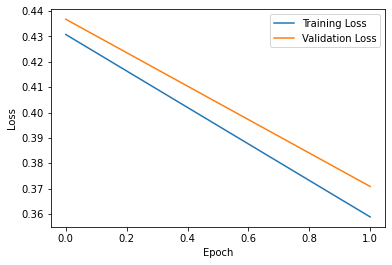

In [59]:
# Функция потерь и точность при обучении
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import f1_score
f_1 = f1_score(y_test_real, test_predicted_values, average='macro')
print(f_1)

0.17308106486691885


In [64]:
from sklearn.metrics import f1_score
f_2 = f1_score(y_test_real, test_predicted_values, average='weighted')
print(f_2)

0.1998008092329721


In [ ]:
x = tf.keras.utils.img_to_array(test_X)
x

In [ ]:
x = tf.keras.utils.img_to_array(test_X)
x

In [ ]:

print(classification_report(test_Y, train_Y))

In [ ]:
test_Y

In [ ]:
from sklearn.metrics import f1_score
f_1 = f1_score(test_Y, train_Y)
print(f_1)

In [ ]:
from sklearn.metrics import f1_score
f_2 = f1_score(train_X, train_Y)
print(f_2)

from sklearn.metrics import classification_report

y_pred = model.predict(train_X)
print(classification_report(test_Y, y_pred))

from sklearn.metrics import f1_score
f_1 = f1_score(y_true, y_pred,)
print(f_1)

from sklearn.metrics import classification_report
report = classification_report(y_test, X_test)
print(report)